# Python K-Means Clustering

This example explains k-means clustering with Python 3, pandas and scikit-learn on Jupyter Notebook. 

## Requirements
To use this example you need Python 3 and latest versions of pandas and scikit-learn. I used Anaconda distribution to install.

### Data Set:
This data set gives us population age distribution by zip code in Los Angeles. It also gives us numbers by gender but for the first iteration we only plot population & their median age.
https://catalog.data.gov/dataset/2010-census-populations-by-zip-code

### ML life-cycle:
1.	*Business objective*: In a democracy it is always election time. Democrats & Republicans are preparing to fight out once during mid-terms and trying to figure what messaging might be most relevant to the people of a certain region.
2.	Data set, wrangle and prepare it.
3.	What the data is saying

## Algorithm
1.	Randomly pick K cluster centers(centroids). 
2.	Assign each point to closest center. By geometry join 2 centroid and devide by perpendicular line to identify closest.
3.	Select the new centroid by taking the average of Euclidean distances of all the points assigned to that cluster.
4.	Repeat 2 and 3 until clustor assignment stop changing.

In [2]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('2010_Census_Populations.csv')
#Data Prepare
# Replacing 0 to NaN
dataset[['Total Population','Median Age']] = dataset[['Total Population','Median Age']].replace(0, np.NaN)
X = dataset.iloc[:, [1, 2]].values
print(X[:20])

# Taking care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X)
X = imputer.transform(X)

print(X[:20])


[[1.00000e+00 7.35000e+01]
 [5.71100e+04 2.66000e+01]
 [5.12230e+04 2.55000e+01]
 [6.62660e+04 2.63000e+01]
 [6.21800e+04 3.48000e+01]
 [3.76810e+04 3.39000e+01]
 [5.91850e+04 3.24000e+01]
 [4.09200e+04 2.40000e+01]
 [3.23270e+04 3.97000e+01]
 [3.80000e+03 3.78000e+01]
 [1.03892e+05 2.62000e+01]
 [3.11030e+04 3.63000e+01]
 [1.17720e+04 4.46000e+01]
 [        nan 4.48000e+01]
 [1.89860e+04 3.13000e+01]
 [4.75960e+04 3.39000e+01]
 [2.37680e+04 2.94000e+01]
 [4.93100e+04 3.32000e+01]
 [6.44580e+04 3.58000e+01]
 [3.89670e+04 3.46000e+01]]
[[1.00000000e+00 7.35000000e+01]
 [5.71100000e+04 2.66000000e+01]
 [5.12230000e+04 2.55000000e+01]
 [6.62660000e+04 2.63000000e+01]
 [6.21800000e+04 3.48000000e+01]
 [3.76810000e+04 3.39000000e+01]
 [5.91850000e+04 3.24000000e+01]
 [4.09200000e+04 2.40000000e+01]
 [3.23270000e+04 3.97000000e+01]
 [3.80000000e+03 3.78000000e+01]
 [1.03892000e+05 2.62000000e+01]
 [3.11030000e+04 3.63000000e+01]
 [1.17720000e+04 4.46000000e+01]
 [3.39646891e+04 4.48000000e+0

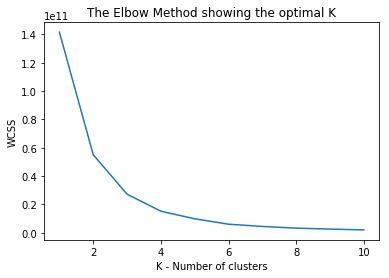

In [3]:
# Using the elbow method to get the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method showing the optimal K')
plt.xlabel('K - Number of clusters')
plt.ylabel('WCSS')
plt.show()

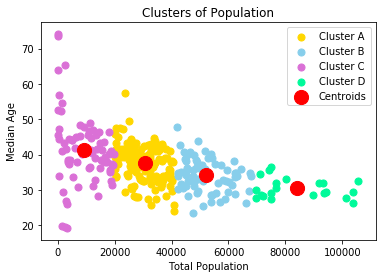

In [5]:
# Fitting K-Means to the sample dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Scatter chart of the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'gold', label = 'Cluster A')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'skyblue', label = 'Cluster B')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'orchid', label = 'Cluster C')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'mediumspringgreen', label = 'Cluster D')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'c', label = 'Cluster E')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'red', label = 'Centroids')
plt.title('Clusters of Population')
plt.xlabel('Total Population')
plt.ylabel('Median Age')
plt.legend()
plt.show()

## Data Story:
This data is 2010 census data. After clustering using K-Means we plotted data which clearly shows most of the population lies around 38 of median age. As population grows median ages is also changing and its coming down. This model gives idea, if business need to manufacture products according to ~age of 40 for 19K population, ~age of 38 for next 21K population, ~age of 37 for 30K, and age of 32 for 35K.

As we can see that in most populous regions the median age is significantly lower, indicating that more younger population inhabits that region. While we see the median age to be ~40 for regions with population < 20k. The political campaign messaging for the more populous region needs to keep in mind the language, tone and policies which appeal to the younger population like social justice, privacy etc. While for older population ~40 years of age, the messaging needs to be around family, taxes, education etc.

## Reference:
[Python Data Science Handbook - K-Means](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb)
